In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%pip install pyfftw
import pyfftw

# Charger l'image en niveaux de gris
image_path = r"C:\Users\DELL\Desktop\tim\myimage.jpg"
image = Image.open(image_path).convert('L')
image_array = np.array(image)

def manual_fft2(image):
    rows, cols = image.shape # Récupérer les dimensions de l'image
    f_transform = np.zeros((rows, cols), dtype=complex) 
    
    u = np.arange(rows).reshape(-1, 1) #
    v = np.arange(cols) 
    
    for x in range(rows):
        exp_factor = np.exp(-2j * np.pi * ((u*x/rows) + (v/cols))) 
        f_transform[x, :] = np.sum(image * exp_factor, axis=1)
    
    f_transform /= (rows * cols)
    return f_transform 

# Utiliser pyfftw pour accélérer le calcul
pyfftw.interfaces.cache.enable()
image_fft = pyfftw.interfaces.numpy_fft.fft2(image_array)
fshift = np.fft.fftshift(image_fft)
magnitude_spectrum = 20 * np.log1p(np.abs(fshift))

# Afficher la représentation dans le domaine fréquentiel
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Représentation dans le domaine fréquentiel (Manuelle)')
plt.show()

# Enregistrer l'image du domaine fréquentiel
plt.imsave(r"C:\Users\DELL\Downloads\frequency_domain_representation_manual.jpg", magnitude_spectrum, cmap='gray')



     ---------------------------------------- 0.0/114.4 kB ? eta -:--:--
     -------------------- ------------------ 61.4/114.4 kB 1.1 MB/s eta 0:00:01
     ------------------------------------ 114.4/114.4 kB 955.2 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [33 lines of output]
      Traceback (most recent call last):
        File "c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 112, in get_requires_for_build_wheel
          backend = _build_backend()
                    ^^^^^^^^^^^^^^^^
        File "c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-p

ModuleNotFoundError: No module named 'pyfftw'

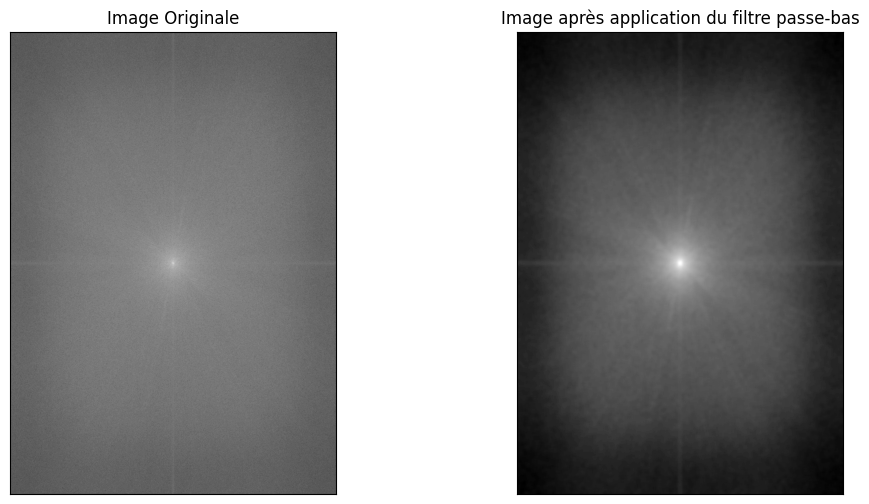

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

image_path = r"C:\Users\DELL\Downloads\frequency_domain_representation_manual.jpg"
image = Image.open(image_path).convert('L')
image = np.array(image)

#traitement

tau = 30          

kernel_size = 21  
kernel = np.fromfunction(lambda x, y: np.exp(-np.sqrt((x - (kernel_size-1)/2)**2 + (y - (kernel_size-1)/2)**2) / tau), (kernel_size, kernel_size))
kernel /= np.sum(kernel)  
filtered_image = convolve2d(image, kernel, mode='same', boundary='symm')
filtered_image = np.clip(filtered_image, 0, 255).astype(np.uint8)
# Save the filtered image
filtered_image_pil = Image.fromarray(filtered_image)
filtered_image_pil.save(r"C:\Users\DELL\Downloads\filtered_image.jpg")

#affichage
plt.figure(figsize=(12, 6))

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Image Originale'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(filtered_image, cmap='gray')
plt.title('Image après application du filtre passe-bas'), plt.xticks([]), plt.yticks([])

plt.show()


Shape of image_back_uint8: (2126, 1500)
Min value: 0
Max value: 255


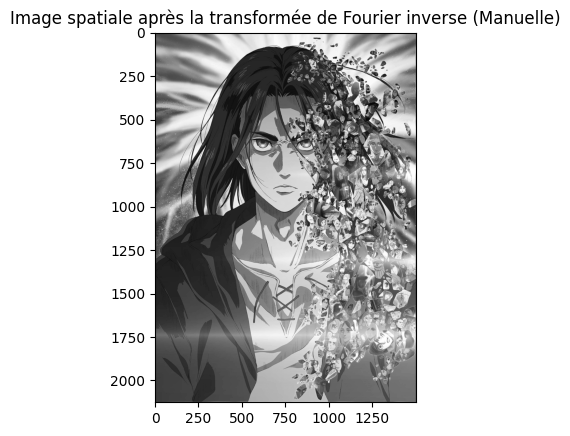

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Charger l'image en niveaux de gris
image_path = r"C:\Users\DELL\Downloads\er.jpg"
image = Image.open(image_path).convert('L')
image_array = np.array(image)

# Calculer la transformée de Fourier de l'image
f_transform = np.fft.fft2(image_array)
f_shift = np.fft.fftshift(f_transform)

# Dimensions de l'image
M, N = image_array.shape

# Matrices de fréquences pour les termes exponentiels
u = np.arange(M).reshape(-1, 1)
v = np.arange(N)
U, V = np.meshgrid(u, v, indexing='ij')

# Calculer l'exp_factor pour la transformée de Fourier inverse
exp_factor = np.exp(2j * np.pi * (U/M + V/N))

# Transformée de Fourier inverse manuelle
f_inverse = np.fft.ifftshift(f_shift * exp_factor)
image_back_complex = np.fft.ifft2(f_inverse)

# Extraire la partie réelle pour obtenir l'image spatiale
image_back = np.real(image_back_complex)

# Normalisation
image_back_normalized = (image_back - np.min(image_back)) / (np.max(image_back) - np.min(image_back))

# Convertir l'image normalisée en uint8 pour l'affichage
image_back_uint8 = np.uint8(image_back_normalized * 255)

# Vérifier la forme et les valeurs de image_back_uint8
print("Shape of image_back_uint8:", image_back_uint8.shape)
print("Min value:", np.min(image_back_uint8))
print("Max value:", np.max(image_back_uint8))

# Assurer que l'image est bien en 2D
if len(image_back_uint8.shape) == 2:
    plt.imshow(image_back_uint8, cmap='gray')
    plt.title('Image spatiale après la transformée de Fourier inverse (Manuelle)')
    plt.show()
else:
    print("L'image n'est pas en 2D, impossible de l'afficher.")


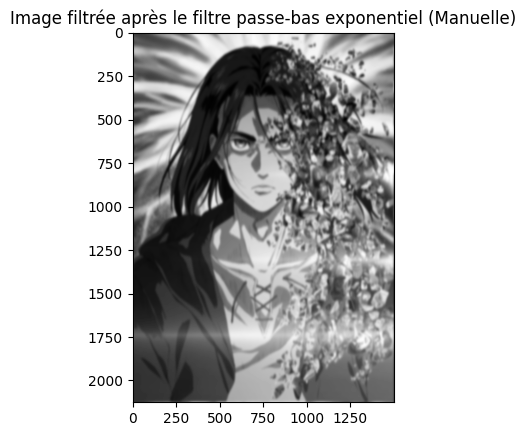

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Charger l'image en niveaux de gris
image_path = r"C:\Users\DELL\Downloads\er.jpg"
image = Image.open(image_path).convert('L')
image_array = np.array(image)

# Calculer la transformée de Fourier de l'image
f_transform = np.fft.fft2(image_array)
f_shift = np.fft.fftshift(f_transform)

# Dimensions de l'image
M, N = image_array.shape

# Matrices de fréquences pour les termes exponentiels
u = np.arange(M).reshape(-1, 1)
v = np.arange(N)
U, V = np.meshgrid(u, v, indexing='ij')

# Filtre passe-bas exponentiel
D_0 = 50  # Rayon du filtre passe-bas
H = np.exp(-((U - M//2)**2 + (V - N//2)**2) / (2 * D_0**2))

# Appliquer le filtre passe-bas à la transformée de Fourier
f_filtered_shift = f_shift * H

# Calculer l'exp_factor pour la transformée de Fourier inverse
exp_factor = np.exp(2j * np.pi * (U/M + V/N))

# Transformée de Fourier inverse manuelle
f_inverse = np.fft.ifftshift(f_filtered_shift * exp_factor)
image_filtered_complex = np.fft.ifft2(f_inverse)

# Extraire la partie réelle pour obtenir l'image spatiale
image_filtered = np.real(image_filtered_complex)

# Normalisation
image_filtered_normalized = (image_filtered - np.min(image_filtered)) / (np.max(image_filtered) - np.min(image_filtered))

# Convertir l'image normalisée en uint8 pour l'affichage
image_filtered_uint8 = np.uint8(image_filtered_normalized * 255)

# Afficher l'image filtrée
plt.imshow(image_filtered_uint8, cmap='gray')
plt.title('Image filtrée après le filtre passe-bas exponentiel (Manuelle)')
plt.show()
